# Noise Catalog Overview
이 노트북은 `data/noise_catalog.csv`로 정리된 AI Hub 소음 메타데이터를 빠르게 살펴보기 위한 템플릿입니다.
실행 전에 `conda activate hallucination_synth` 후 필요한 패키지(`pandas`, `matplotlib`, `seaborn`)가 설치되어 있는지 확인하세요.

In [2]:
!pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

project_root = Path('..')
catalog_path = project_root / 'data' / 'noise_catalog.csv'
catalog_path

PosixPath('../data/noise_catalog.csv')

In [4]:
catalog = pd.read_csv(catalog_path)
catalog.head()

,dataset_name,split,category_dir,subcategory_dir,label_json_path,audio_path,label_name,clip_start_sec,clip_end_sec,clip_duration_sec,category_01,category_02,category_03,sub_category,decibel,source_sample_rate_hz,source_channels,audio_duration_sec
0,130.도시_소리_데이터,Training,1.자동차,1.자동차/1.차량경적,130.도시_소리_데이터/01.데이터/1.Training/라벨링데이터/1.자동차/1...,130.도시_소리_데이터/01.데이터/1.Training/원천데이터/1.자동차/1....,1.자동차_1_1.wav,3.45,4.880,1.430,교통소음,자동차,차량경적,소형차경적,72.0,44100,1,9.200
1,130.도시_소리_데이터,Training,1.자동차,1.자동차/1.차량경적,130.도시_소리_데이터/01.데이터/1.Training/라벨링데이터/1.자동차/1...,130.도시_소리_데이터/01.데이터/1.Training/원천데이터/1.자동차/1....,1.자동차_100_1.wav,2.67,3.460,0.790,교통소음,자동차,차량경적,소형차경적,69.0,44100,1,9.630
2,130.도시_소리_데이터,Training,1.자동차,1.자동차/1.차량경적,130.도시_소리_데이터/01.데이터/1.Training/라벨링데이터/1.자동차/1...,130.도시_소리_데이터/01.데이터/1.Training/원천데이터/1.자동차/1....,1.자동차_10000_1.wav,2.00,2.816,0.816,교통소음,자동차,차량경적,대형차경적,116.0,44100,1,4.816
3,130.도시_소리_데이터,Training,1.자동차,1.자동차/1.차량경적,130.도시_소리_데이터/01.데이터/1.Training/라벨링데이터/1.자동차/1...,130.도시_소리_데이터/01.데이터/1.Training/원천데이터/1.자동차/1....,1.자동차_10001_1.wav,2.00,4.419,2.419,교통소음,자동차,차량경적,소형차경적,99.0,44100,1,6.419
4,130.도시_소리_데이터,Training,1.자동차,1.자동차/1.차량경적,130.도시_소리_데이터/01.데이터/1.Training/라벨링데이터/1.자동차/1...,130.도시_소리_데이터/01.데이터/1.Training/원천데이터/1.자동차/1....,1.자동차_10002_1.wav,2.00,2.980,0.980,교통소음,자동차,차량경적,소형차경적,76.0,44100,1,4.980


In [5]:
catalog['clip_duration_sec'].describe()

count    67793.000000
mean        19.122106
std         17.893932
min          0.208000
25%          4.882000
50%         11.373000
75%         30.255000
max         60.000000
Name: clip_duration_sec, dtype: float64

In [6]:
top_categories = catalog['category_02'].value_counts().head(10)
top_categories

category_02
이륜자동차    10312
공사장      10251
충격        8348
자동차       7736
공장        6851
항공기       5612
열차        4983
도구        4598
동물        4584
가전        4518
Name: count, dtype: int64

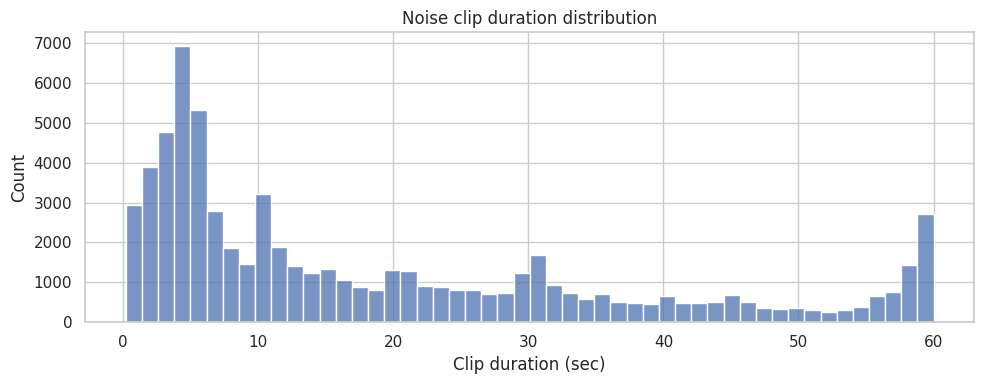

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(catalog['clip_duration_sec'], bins=50)
plt.xlabel('Clip duration (sec)')
plt.ylabel('Count')
plt.title('Noise clip duration distribution')
plt.tight_layout()